## Experiment 1
__The objective is to implement K-Means Clustering Algorithm manually without using Scikit-learn. The goal is to classify a set of given 2D data points into distinct clusters__

In [2]:
#Import necessary libraries
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# K-Means Clustering implementation
def k_means_clustering(data, k, max_iterations):
    # Randomly choose k initial centroids from the data points
    centroids = random.sample(data, k)
    
    for _ in range(max_iterations):
        # Create clusters
        clusters = [[] for _ in range(k)]
        
        # Assign each point to the nearest centroid
        for point in data:
            distances = [math.sqrt((point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2) for centroid in centroids]
            nearest_centroid_index = distances.index(min(distances))
            clusters[nearest_centroid_index].append(point)
        
        # Update centroids by calculating the mean of each cluster
        new_centroids = []
        for cluster in clusters:
            if cluster:  # Avoid empty clusters
                new_centroid = (sum(point[0] for point in cluster) / len(cluster),
                                sum(point[1] for point in cluster) / len(cluster))
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(random.choice(data))  # Reinitialize randomly if the cluster is empty
        
        # Stop if centroids do not change
        if new_centroids == centroids:
            break
        
        centroids = new_centroids  # Update centroids for the next iteration

    return clusters,centroids

In [6]:
# Data points
data_points = [(2, 10), (2, 5), (8, 4),
               (5, 8), (7, 5), (6, 4),
               (1, 2), (4, 9)]

# Parameters
k = 3  # Number of clusters
max_iterations = 100  # Maximum iterations

In [8]:
# Perform K-Means Clustering
result_clusters,centroids = k_means_clustering(data_points, k, max_iterations)

In [10]:
# Print the results
for i, cluster in enumerate(result_clusters):
    print(f"Cluster {i + 1}: {cluster}")

Cluster 1: [(2, 5), (1, 2)]
Cluster 2: [(8, 4), (7, 5), (6, 4)]
Cluster 3: [(2, 10), (5, 8), (4, 9)]


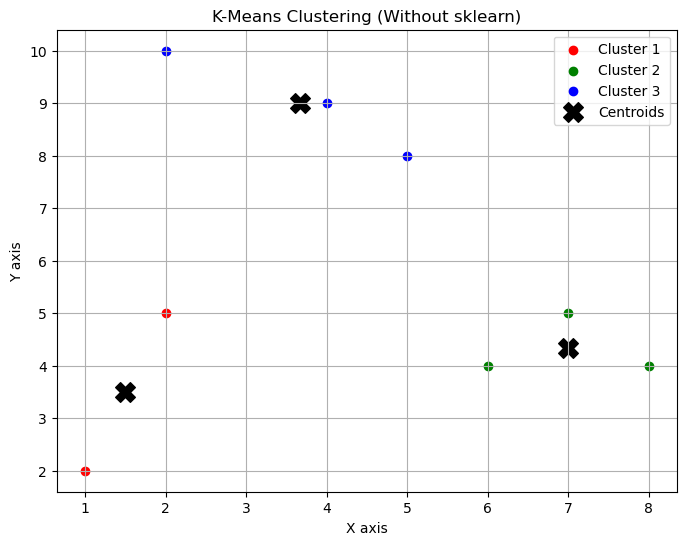

In [12]:
# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, cluster in enumerate(result_clusters):
    # Convert cluster to numpy array for easy plotting
    cluster_array = np.array(cluster)
    plt.scatter(cluster_array[:, 0], cluster_array[:, 1], color=colors[i], label=f'Cluster {i + 1}')

# Plot centroids
centroids_array = np.array(centroids)
plt.scatter(centroids_array[:, 0], centroids_array[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (Without sklearn)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()